In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

X_train = pd.read_csv('../data/X_train.csv')
X_test = pd.read_csv('../data/X_test.csv')
Y_train = pd.read_csv('../data/Y_train.csv')
Y_test = pd.read_csv('../data/Y_test.csv')

# Decision Tree Regression

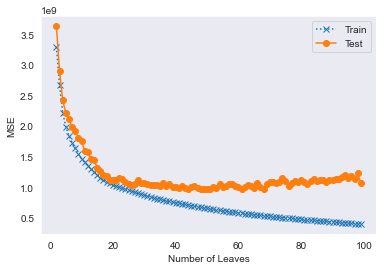

In [4]:
errors = []

for max_leaves in range(2,100):
    # train and predict
    dt = DecisionTreeRegressor(max_leaf_nodes=max_leaves)
    dt.fit(X_train,Y_train)

    # compute Accuracy
    train_acc = mean_squared_error(y_true=Y_train, y_pred=dt.predict(X_train))
    test_acc  = mean_squared_error(y_true=Y_test,  y_pred=dt.predict(X_test))

    errors += [ [max_leaves, train_acc, test_acc] ]

errors = np.array(errors)

fig, ax = plt.subplots()
ax.plot(errors[:,0], errors[:,1], "x:", label="Train")
ax.plot(errors[:,0], errors[:,2], "o-", label="Test")
ax.set_ylabel("MSE")
ax.set_xlabel("Number of Leaves")
ax.grid()
ax.legend();

In [5]:
# it seems that around 20 as max_leaves parameter the test becomes worse than the train. Let's see what MSE we have when max_leaves=20

dt = DecisionTreeRegressor(max_leaf_nodes=20)
dt.fit(X_train,Y_train)

print("Train Error: {:.3f}".format(mean_squared_error(y_true=Y_train, y_pred=dt.predict(X_train)) ))
print("Train Error: {:.3f}".format(mean_squared_error(y_true=Y_test,  y_pred=dt.predict(X_test)) ))


Train Error: 1040027901.756
Train Error: 1125416336.329


In [6]:
# it seems that around 20 as max_leaves parameter the test becomes worse than the train. Let's see what MSE we have when max_leaves=19

dt = DecisionTreeRegressor(max_leaf_nodes=19)
dt.fit(X_train,Y_train)

print("Train Error: {:.3f}".format(mean_squared_error(y_true=Y_train, y_pred=dt.predict(X_train)) ))
print("Train Error: {:.3f}".format(mean_squared_error(y_true=Y_test,  y_pred=dt.predict(X_test)) ))

Train Error: 1061214701.173
Train Error: 1119285478.960


These results aren't satisfactory because the Mean Squared Error is very high both in the training phase and in the test phase